# Neural Networks

## XNOR

In [17]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [18]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [19]:
from si.supervised import NN, Dense, Activation
from si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [20]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [21]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [22]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [23]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [24]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [25]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [26]:
nn2.fit(dataset)
nn2.is_fitted = True #professor ele realizava o fit, mad não mudava o is_fitted para true, dai ter forçado aqui

och 36637/100000, error= 0.0027758286975762365epoch 37632/100000, error= 0.002634801015583361epoch 41100/100000, error= 0.0022352895845526187epoch 44662/100000, error= 0.001930870968040725epoch 45648/100000, error= 0.001860268815484445epoch 49067/100000, error= 0.001649893247908327epoch 50815/100000, error= 0.0015592031252720205epoch 51604/100000, error= 0.0015213562564255865epoch 55303/100000, error= 0.001365314328941386epoch 57046/100000, error= 0.0013020811676632904epoch 64879/100000, error= 0.0010764307068161457epoch 67631/100000, error= 0.0010142520935993377epoch 68444/100000, error= 0.0009972004925361457epoch 72224/100000, error= 0.0009247399116803726epoch 75015/100000, error= 0.0008775059620808617epoch 76973/100000, error= 0.0008470857175074503epoch 80971/100000, error= 0.0007909553014637012epoch 82855/100000, error= 0.0007669504893481946epoch 83813/100000, error= 0.0007552821788125773epoch 86729/100000, error= 0.000721809109316974epoch 87654/100000, error= 0.0007117889227356461

In [31]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

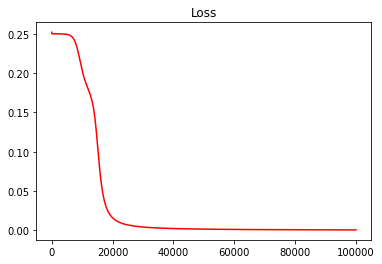

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [33]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [34]:
nn2.cost(dataset.X,dataset.y)

0.0006001229866480768